<h1><center>☀️Holiday Packages Data Analysis🔎</center></h1>
<h3><center>🏄(Prediction at the end)🔮</center></h3>
<center><img src= "https://res.cloudinary.com/lastminute-contenthub/image/upload/c_limit,w_370,h_205/v1559836493/DAM/Artwork/DP/Holidays%20deals%20themed/370x205_all_inclusive_holidays.jpg" alt ="Holidays" style='width: 600px;'></center>

<h3>Overview</h3>

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

<h3>Content</h3>

What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.

- Most important features that have an impact on Product taken: Designation, Passport, Tier City, Martial status, occupation
- Customers with Designation as Executive should be the target customers for the company .Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.
- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.

<h3>Tasks to Solve :</h3>

- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../input/holiday-package-purchase-prediction/Travel.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 4888 rows
There is 20 columns


In [5]:
# Eliminate duplicates
print('There are' , df.duplicated().sum() , 'duplicates')
df.loc[df.duplicated(keep=False),:]
df.drop_duplicates(keep='first',inplace=True)
print('There is now' , df.shape[0] , 'rows')
print('There is now' , df.shape[1] , 'columns')

There are 0 duplicates
There is now 4888 rows
There is now 20 columns


# Analysing freatures and target

In [6]:
df = data.copy()
target = pd.DataFrame()
target['ProdTaken'] = df['ProdTaken'].map({0:'Not Taken',1:'Taken'})
df = df.drop(['CustomerID','ProdTaken'],axis=1)
df = df.fillna(df.median())
df = df.dropna()
df.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0



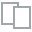
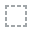
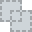
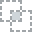
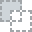
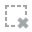
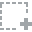
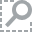
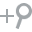
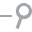
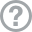
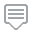
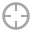
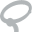
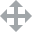
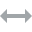
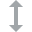
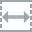
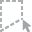
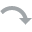
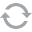
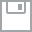
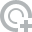
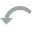
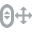
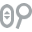
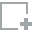
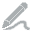
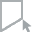
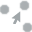
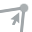
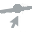

In [7]:
plot_correlation(df)

<h1><center><font size="30">Categorical Features</font></center></h1>

In [8]:
categorical_df = pd.DataFrame()
for col in df.select_dtypes(include=['object','int64']):
    categorical_df[col] = df[col]
categorical_df['PreferredPropertyStar'] = df['PreferredPropertyStar']
for col in categorical_df:
    print(f'{col :-<50} {df[col].unique()}')

TypeofContact------------------------------------- ['Self Enquiry' 'Company Invited']
CityTier------------------------------------------ [3 1 2]
Occupation---------------------------------------- ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender-------------------------------------------- ['Female' 'Male' 'Fe Male']
NumberOfPersonVisiting---------------------------- [3 2 1 4 5]
ProductPitched------------------------------------ ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus------------------------------------- ['Single' 'Divorced' 'Married' 'Unmarried']
Passport------------------------------------------ [1 0]
PitchSatisfactionScore---------------------------- [2 3 5 4 1]
OwnCar-------------------------------------------- [1 0]
Designation--------------------------------------- ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
PreferredPropertyStar----------------------------- [3. 4. 5.]


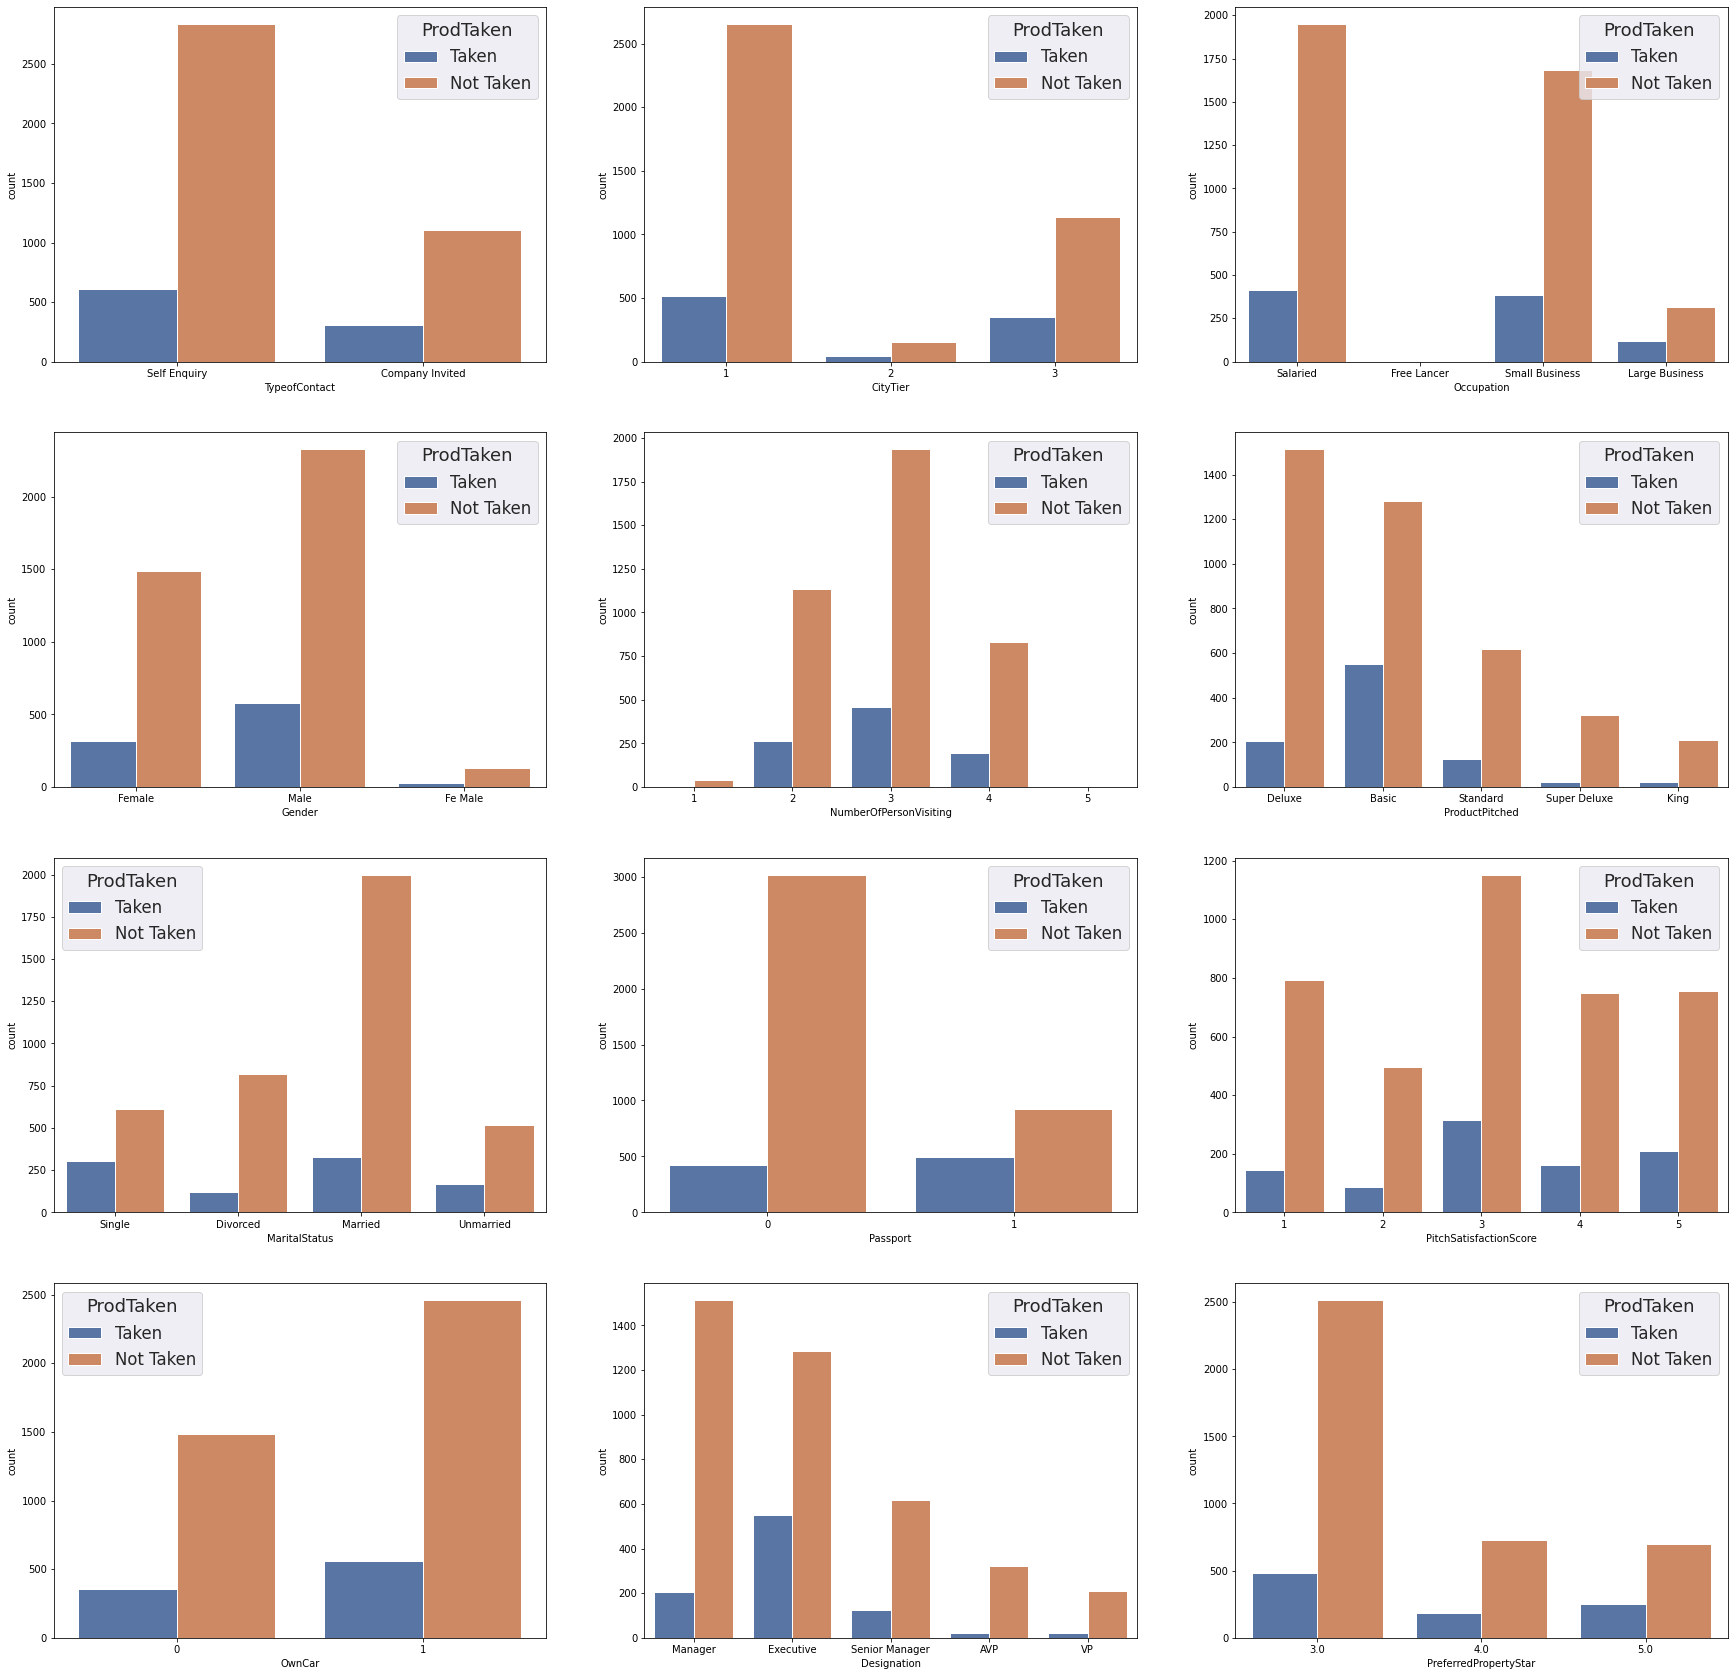

In [9]:
fig, ax = plt.subplots(4,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in categorical_df: 
    sns.countplot(categorical_df[col], hue=target['ProdTaken'], ax=ax[i//3][i%3])
    i=i+1
plt.show()

<h1><center><font size="30">Continuous Features</font></center></h1>

In [10]:
numeric_df = df.copy()
for col in categorical_df:
    numeric_df = numeric_df.drop(col,axis=1)
numeric_df.head()

,Age,DurationOfPitch,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
0,41.0,6.0,3.0,1.0,0.0,20993.0
1,49.0,14.0,4.0,2.0,2.0,20130.0
2,37.0,8.0,4.0,7.0,0.0,17090.0
3,33.0,9.0,3.0,2.0,1.0,17909.0
4,36.0,8.0,3.0,1.0,0.0,18468.0


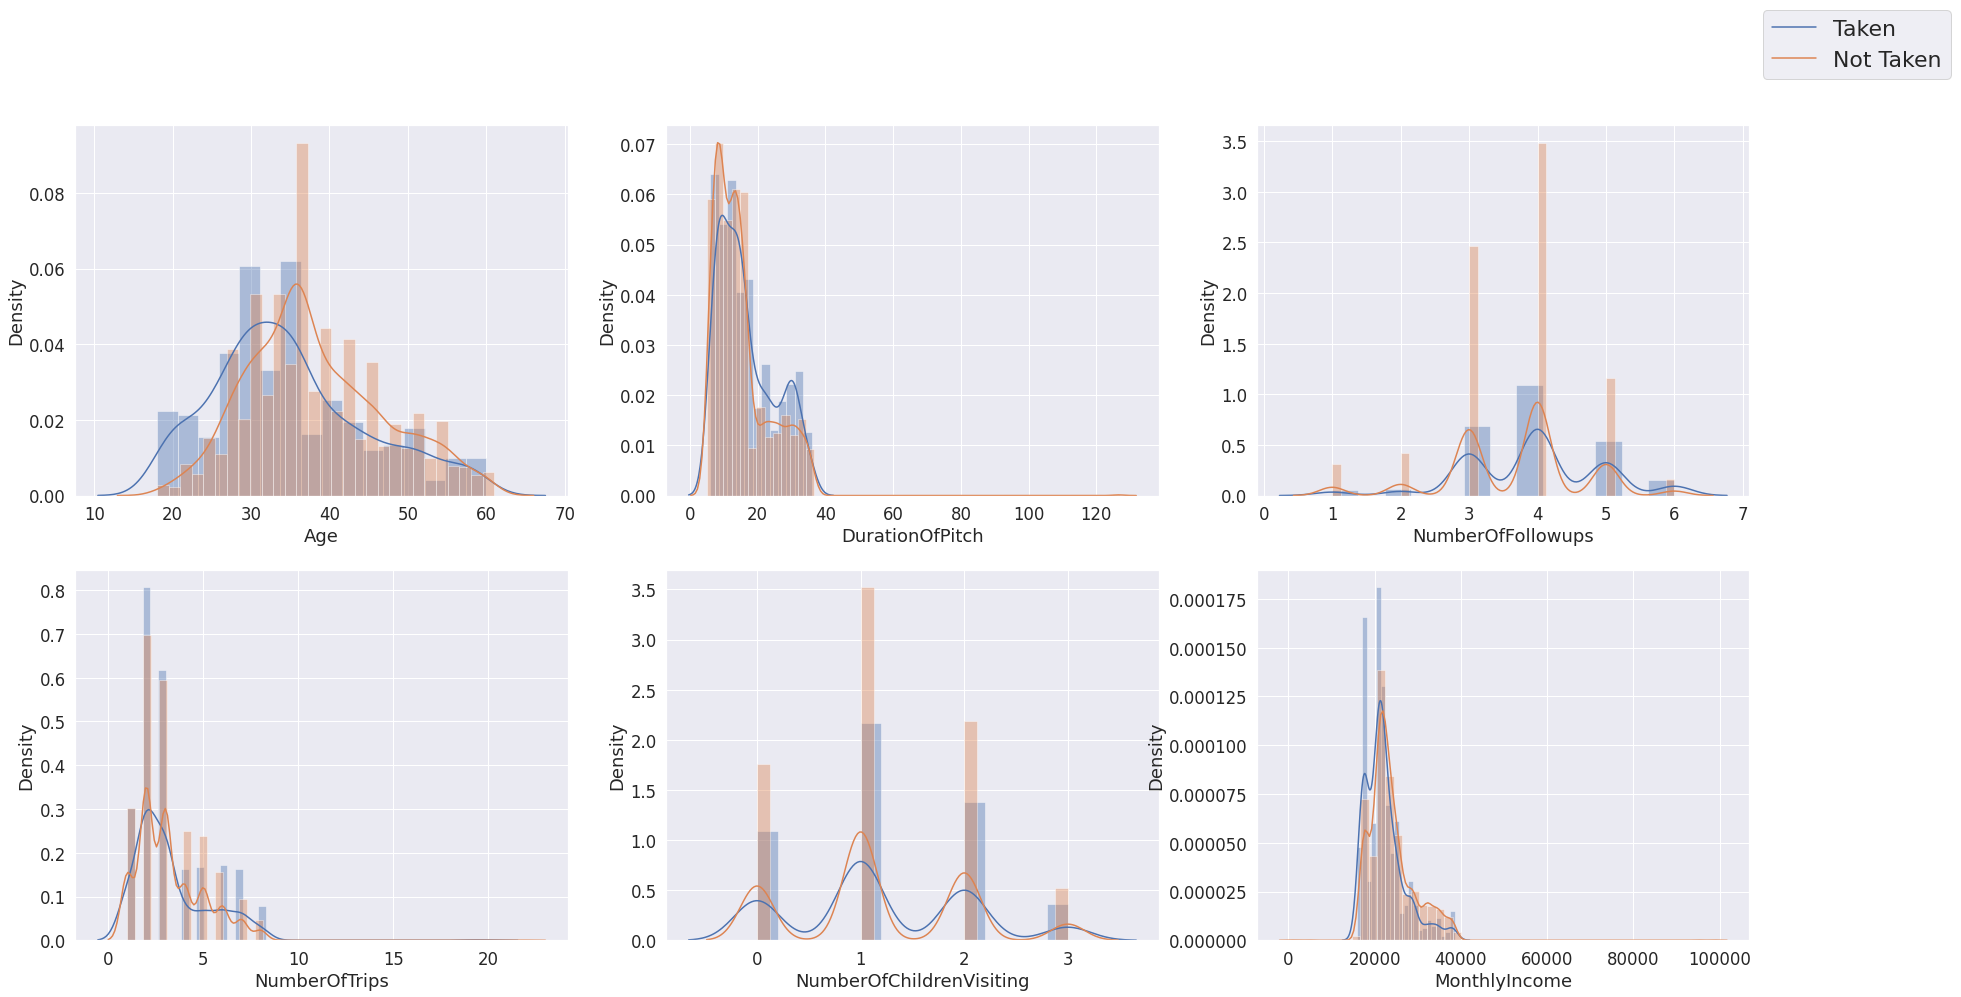

In [11]:
taken_df = numeric_df[target['ProdTaken']=="Taken"]
not_taken_df = numeric_df[target['ProdTaken']=="Not Taken"]
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(2,3, figsize=(30, 15))
i=0
for col in numeric_df:
    sns.distplot(taken_df[col],label='Taken',ax=ax[i//3][i%3])
    sns.distplot(not_taken_df[col],label='Not Taken',ax=ax[i//3][i%3])
    i=i+1
fig.legend(labels=['Taken','Not Taken'],fontsize='22')
fig.show()

# A bit of data engineering
## Let's answer in the same time the question "What are the most significant features for taking a product?"

In [12]:
def encoding(df):
    code = {'Self Enquiry':0,
            'Company Invited':1,
            'Salaried':0,
            'Free Lancer':1,
            'Small Business':2,
            'Large Business':3,
            'Female':0,
            'Male':1,
            'Deluxe':0,
            'Basic':1,
            'Standard':2,
            'SuperDeluxe':3,
            'King':4,
            'Single':0,
            'Divorced':1,
            'Married':2,
            'Unmarried':3,
            'Manager':0,
            'Executive':1,
            'Senior Manager':2,
            'AVP':3,
            'VP':4
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)        
    return df

def imputation(df):
    df = df.fillna(df.median())
    df = df.dropna()
    return df

def feature_engineering(df):
    useless_columns = ['CustomerID']
    df = df.drop(useless_columns,axis=1)
    return df

def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('ProdTaken',axis=1)
    y = df['ProdTaken']    

    return df,X,y

In [13]:
df = data.copy()
df,X,y=preprocessing(df)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(3,'Score'))  #print 3 best features

            Specs         Score
17  MonthlyIncome  91649.503852
12       Passport    235.825285
0             Age    222.966448


<h1><center><font size="30">Target Distribution</font></center></h1>

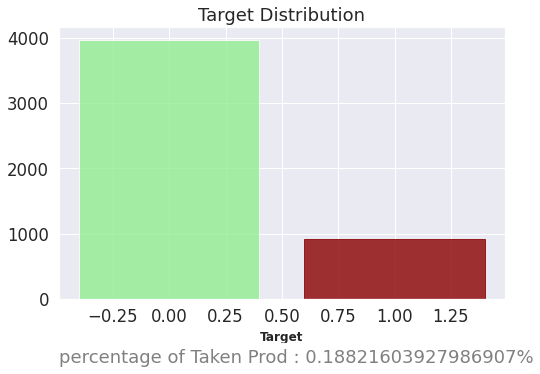

In [15]:
target_dist = df['ProdTaken'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(8,5))

barplot = plt.bar(target_dist.index, target_dist, color = 'lightgreen', alpha = 0.8)
barplot[1].set_color('darkred')

ax.set_title('Target Distribution')
ax.annotate("percentage of Taken Prod : {}%".format(df['ProdTaken'].sum() / len(df['ProdTaken'])),
              xy=(0, 0),xycoords='axes fraction', 
              xytext=(0,-50), textcoords='offset points',
              va="top", ha="left", color='grey',
              bbox=dict(boxstyle='round', fc="w", ec='w'))

plt.xlabel('Target', fontsize = 12, weight = 'bold')
plt.show()

# Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the <code>DataFrame.sample</code> method to get random samples each class:

In [16]:
# Class count
count_class_0, count_class_1 = target['ProdTaken'].value_counts()

# Divide by class
df_class_0 = df[target['ProdTaken'] == 'Not Taken']
df_class_1 = df[target['ProdTaken'] == 'Taken']

print(count_class_0)
print(count_class_1)

3968
920


Random under-sampling:
0    920
1    920
Name: ProdTaken, dtype: int64


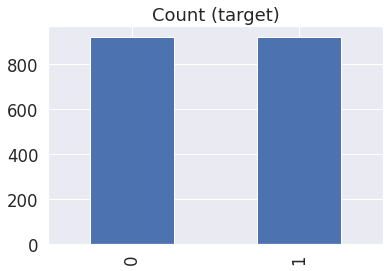

In [17]:
df_class_0_under = df_class_0.sample(count_class_1,random_state=42)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['ProdTaken'].value_counts())

df_under['ProdTaken'].value_counts().plot(kind='bar', title='Count (target)');

Text(0.5, 1.0, 'TestSet')

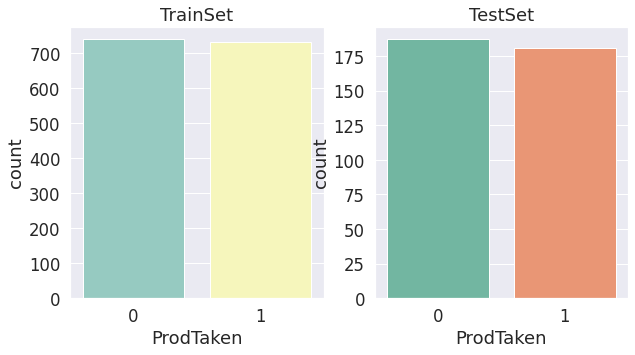

In [18]:
trainset, testset = train_test_split(df_under, test_size=0.2, random_state=42)
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.countplot(x = trainset['ProdTaken'] , data = trainset['ProdTaken'],ax=ax[0],palette="Set3").set_title('TrainSet')
sns.countplot(x = testset['ProdTaken'] , data = testset['ProdTaken'],ax=ax[1],palette="Set2").set_title('TestSet')

In [19]:
X_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
X_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

## Creating models

In [20]:
preprocessor = make_pipeline(RobustScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=3,random_state=42))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=42))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=42))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=42,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag',random_state=42))

## PCA Analysis

In [21]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X_train))
y_train.reset_index(drop=True, inplace=True)
PCA_df = pd.concat([PCA_df, y_train], axis=1, ignore_index=True )
PCA_df.head()

,0,1,2,3
0,1.372995,-0.843920,-1.040109,0
1,-1.829339,-1.026244,0.828811,0
2,-1.354951,0.155482,0.103396,1
3,0.412101,1.724940,0.825451,1
4,-0.595485,-0.333101,2.128083,1


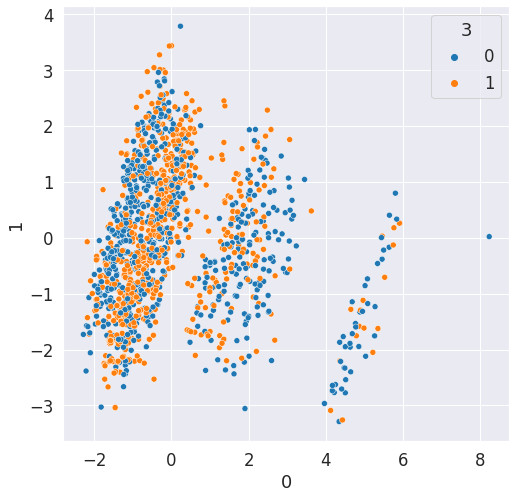

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df[3],palette=sns.color_palette("tab10", 2))
plt.show()

In [23]:
import plotly.express as px
figure1 = px.scatter_3d(PCA_df,
        x=0, 
        y=1, 
        z=2, 
        color = 3,
                       width=600, height=800)
figure1.update_traces(marker=dict(size=5,
                              line=dict(width=0.2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

figure1.show()

# Training models
## Models overview

In [24]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [25]:
def evaluation(model):
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, test_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(5,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, test_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()

---------------------------------
RandomForest
Accuracy =  0.8614130434782609
-
[[160  27]
 [ 24 157]]
-
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       187
           1       0.85      0.87      0.86       181

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368

-


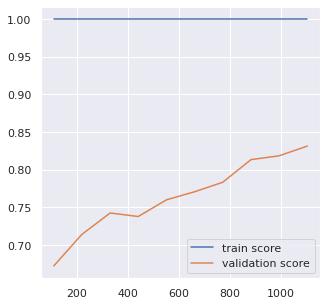

---------------------------------
AdaBoost
Accuracy =  0.7146739130434783
-
[[138  49]
 [ 56 125]]
-
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       187
           1       0.72      0.69      0.70       181

    accuracy                           0.71       368
   macro avg       0.71      0.71      0.71       368
weighted avg       0.71      0.71      0.71       368

-


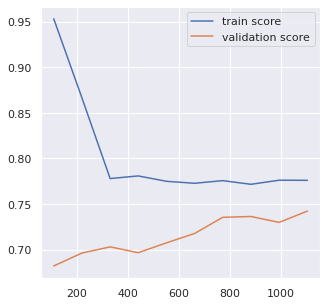

---------------------------------
SVM
Accuracy =  0.7527173913043478
-
[[144  43]
 [ 48 133]]
-
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       187
           1       0.76      0.73      0.75       181

    accuracy                           0.75       368
   macro avg       0.75      0.75      0.75       368
weighted avg       0.75      0.75      0.75       368

-


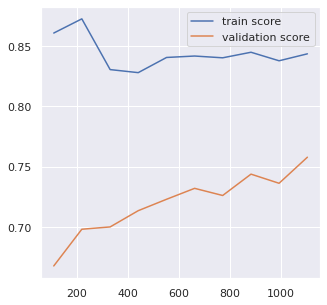

---------------------------------
KNN
Accuracy =  0.7445652173913043
-
[[135  52]
 [ 42 139]]
-
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       187
           1       0.73      0.77      0.75       181

    accuracy                           0.74       368
   macro avg       0.75      0.74      0.74       368
weighted avg       0.75      0.74      0.74       368

-


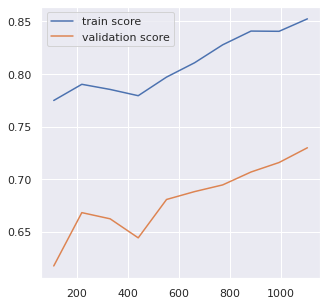

---------------------------------
LR
Accuracy =  0.6603260869565217
-
[[127  60]
 [ 65 116]]
-
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       187
           1       0.66      0.64      0.65       181

    accuracy                           0.66       368
   macro avg       0.66      0.66      0.66       368
weighted avg       0.66      0.66      0.66       368

-


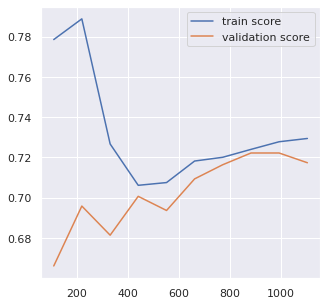

In [26]:
sns.set(font_scale = 1)
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    model.fit(X_train,y_train)
    evaluation(model)

## Using RandomForest

Accuracy =  0.8614130434782609
-
[[160  27]
 [ 24 157]]
-
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       187
           1       0.85      0.87      0.86       181

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368

-


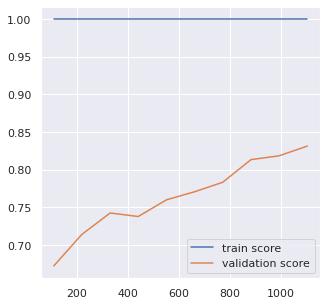

In [27]:
RandomPipeline.fit(X_train, y_train)
evaluation(RandomPipeline)

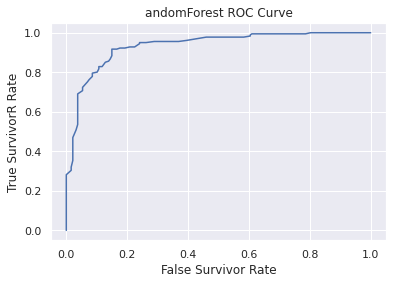

In [28]:
y_pred_prob = RandomPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='RandomForest ROC Curve')
plt.xlabel("False Survivor Rate")
plt.ylabel("True SurvivorR Rate")
plt.title("andomForest ROC Curve")
plt.show()

### Optimization

In [29]:
from sklearn.model_selection import RandomizedSearchCV
RandomPipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__robustscaler', 'pipeline__robustscaler__copy', 'pipeline__robustscaler__quantile_range', 'pipeline__robustscaler__with_centering', 'pipeline__robustscaler__with_scaling', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier

In [30]:
hyper_params = {
    'randomforestclassifier__n_estimators':[10,100,150,250,400,600],
    'randomforestclassifier__criterion':['gini','entropy'],
    'randomforestclassifier__min_samples_split':[2,6,12],
    'randomforestclassifier__min_samples_leaf':[1,4,6,10],
    'randomforestclassifier__max_features':['auto','srqt','log2',int,float],
    'randomforestclassifier__verbose':[0,1,2],
    'randomforestclassifier__class_weight':['balanced','balanced_subsample'],
    'randomforestclassifier__n_jobs':[-1],
}

In [ ]:
RF_grid = RandomizedSearchCV(RandomPipeline,hyper_params,scoring='accuracy',n_iter=40)
RF_grid.fit(X_train,y_train)

In [32]:
print(RF_grid.best_params_)

{'randomforestclassifier__verbose': 1, 'randomforestclassifier__n_jobs': -1, 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 6, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__class_weight': 'balanced_subsample'}


In [ ]:
best_forest = (RF_grid.best_estimator_)
best_forest.fit(X_train,y_train)
# calculating the probabilities
y_pred_proba = best_forest.predict_proba(X_test)
#Finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

N, train_score, test_score = learning_curve(best_forest, X_train, y_train, 
                                           cv=4, scoring='f1', 
                                           train_sizes=np.linspace(0.1,1,10))

Accuracy =  0.8559782608695652
-
[[162  25]
 [ 28 153]]
-
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       187
           1       0.86      0.85      0.85       181

    accuracy                           0.86       368
   macro avg       0.86      0.86      0.86       368
weighted avg       0.86      0.86      0.86       368

-


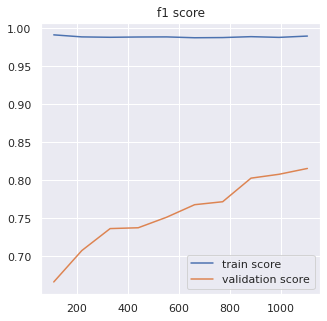

In [34]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('-')
print(confusion_matrix(y_test,y_pred))
print('-')
print(classification_report(y_test,y_pred))
print('-')
    
plt.figure(figsize=(5,5))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, test_score.mean(axis=1), label='validation score')
plt.legend()
plt.title('f1 score')
plt.show()

## Using KNN

Text(0, 0.5, 'Mean Err')

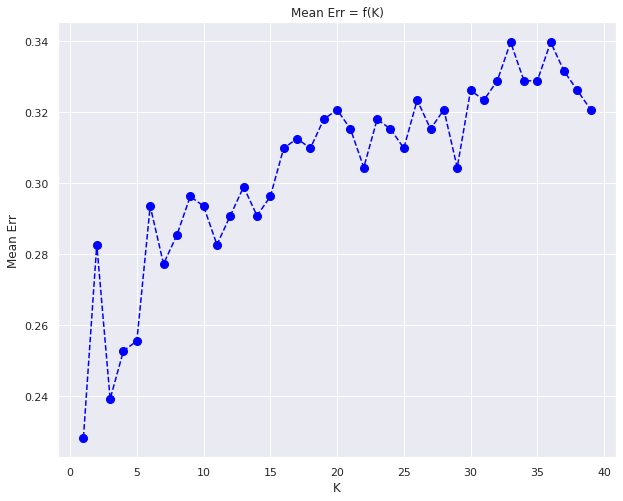

In [35]:
err = []
  
for i in range(1, 40):
    
    model = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors = i))
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    err.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 8))
plt.plot(range(1, 40), err, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='blue', markersize = 8)
  
plt.title('Mean Err = f(K)')
plt.xlabel('K')
plt.ylabel('Mean Err')

In [36]:
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors = 1))
KNNPipeline.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('robustscaler', RobustScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

Accuracy =  0.7717391304347826
-
[[130  57]
 [ 27 154]]
-
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       187
           1       0.73      0.85      0.79       181

    accuracy                           0.77       368
   macro avg       0.78      0.77      0.77       368
weighted avg       0.78      0.77      0.77       368

-


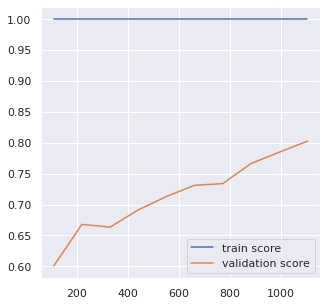

In [37]:
evaluation(KNNPipeline)

## Using XGBoost

Accuracy =  0.8532608695652174
-
[[156  31]
 [ 23 158]]
-
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       187
           1       0.84      0.87      0.85       181

    accuracy                           0.85       368
   macro avg       0.85      0.85      0.85       368
weighted avg       0.85      0.85      0.85       368

-


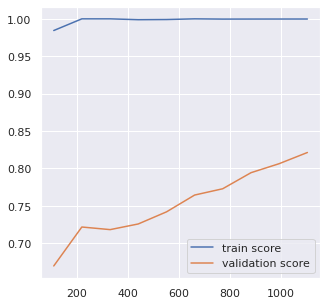

In [38]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
     learning_rate = 0.15,
     n_estimators= 3000,
     max_depth= 16,
     min_child_weight= 2,
     #gamma=1,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     eval_metric = 'logloss',
     nthread= -1,
     scale_pos_weight=1).fit(X_train, y_train)
evaluation (gbm)

## Using SVM

Accuracy =  0.7527173913043478
-
[[144  43]
 [ 48 133]]
-
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       187
           1       0.76      0.73      0.75       181

    accuracy                           0.75       368
   macro avg       0.75      0.75      0.75       368
weighted avg       0.75      0.75      0.75       368

-


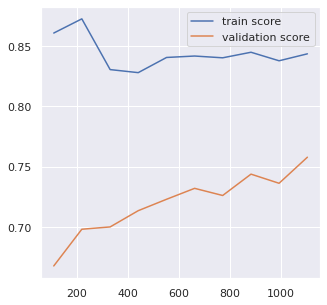

In [39]:
SVMPipeline.fit(X_train, y_train)
evaluation(SVMPipeline)

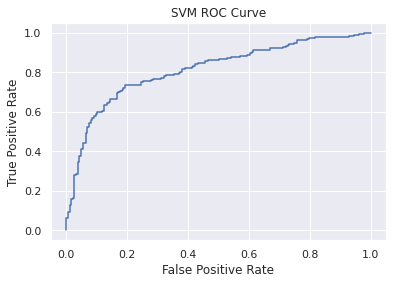

In [40]:
y_pred_prob = SVMPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='SVM ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.show()

# Tuning Threshold

In [41]:
best_classifier = RF_grid

thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
best_t = 0.3
best_acc = 0
for t in thresholds:
    y_pred = (best_classifier.predict_proba(X_test)[:,1] >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc=acc
        best_t=t

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_job

In [42]:
print('Accuracy on test set :',round(best_acc*100),"%")
print('Best threshold :',best_t)

Accuracy on test set : 86 %
Best threshold : 0.5


***
# Best Estimator : RandomForest
# Final accuracy on test set : 89% and could be improved
# *Note* : XGBoost follows with 85% accuracy
  
***